In [65]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, ttest_rel, wilcoxon, f_oneway, kruskal
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_excel('data/cleaned/data.xlsx').drop('Marca temporal',axis=1)

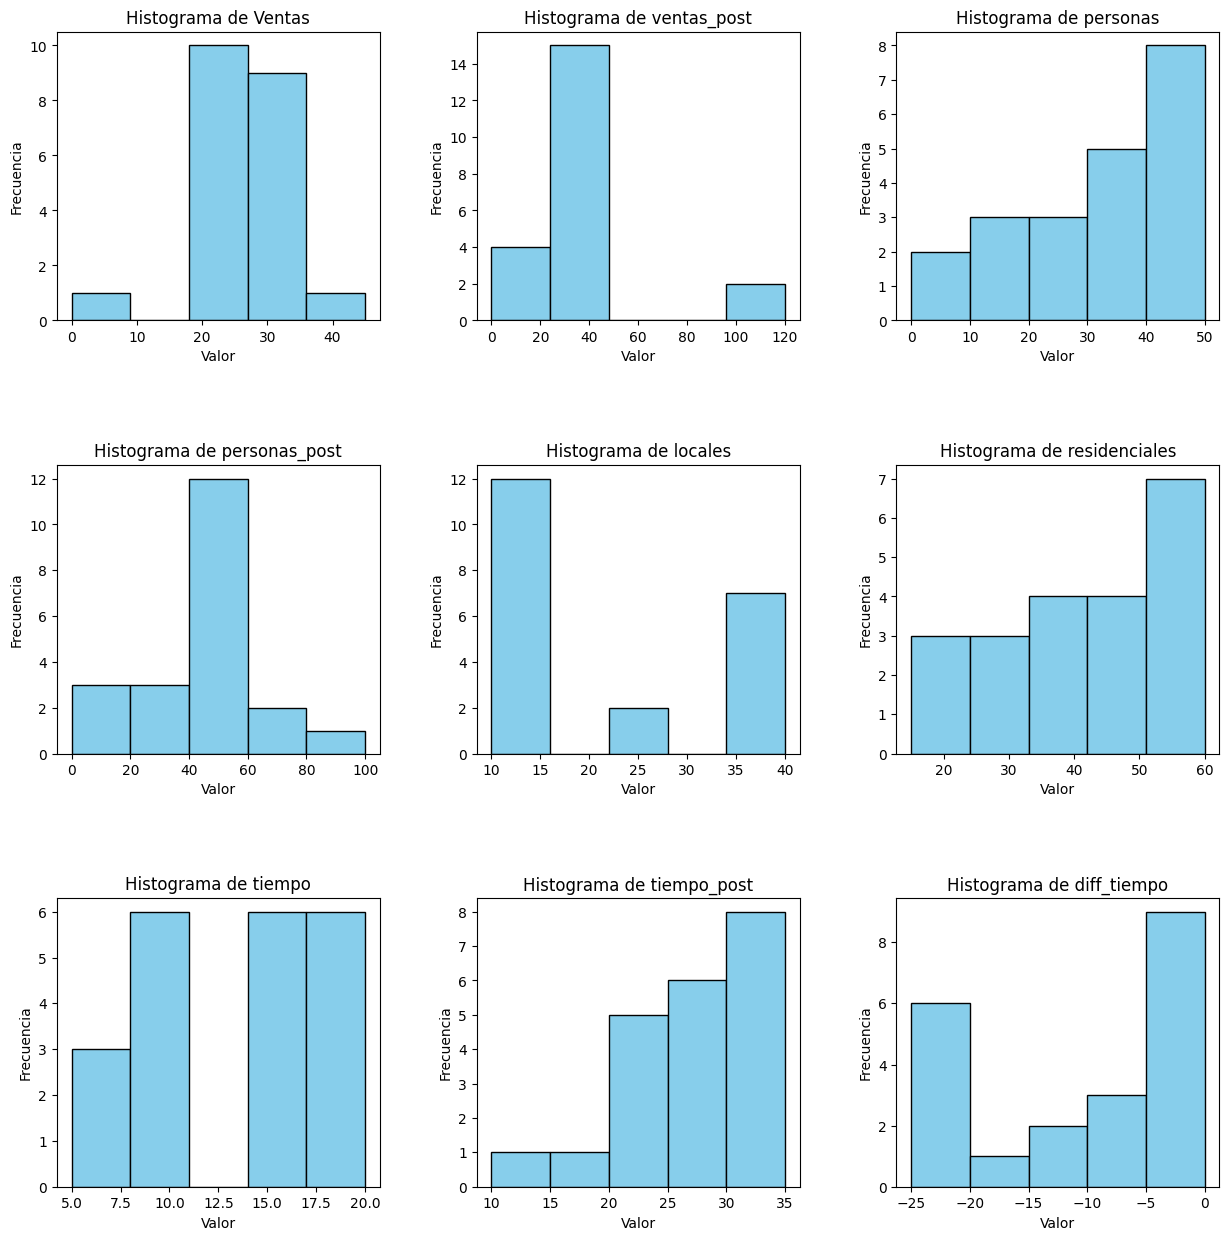

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  

for i, col in enumerate(df.columns[1:]):
    ax = axes[i // 3, i % 3]
    ax.hist(df[col], bins=5, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')


plt.subplots_adjust(hspace=0.5, wspace=0.3) 

plt.show()

In [68]:
def test_normalidad(group):
    stat, p = shapiro(group)
    return p > 0.05

def test_homogeneidad(g1, g2):
    stat, p = levene(g1, g2)
    return p > 0.05

In [69]:
indep = df[df['actividad'] == 'independiente']
emple = df[df['actividad'] == 'empleado']

cols_grupo = ['Ventas', 'ventas_post', 'personas', 'personas_post', 'locales', 'residenciales', 'tiempo', 'tiempo_post']

In [70]:
cols_grupo = ['Ventas', 'ventas_post', 'personas', 'personas_post', 'locales', 'residenciales', 'tiempo', 'tiempo_post']

for col in cols_grupo:
    g1 = indep[col].dropna()
    g2 = emple[col].dropna()

    norm1 = test_normalidad(g1)
    norm2 = test_normalidad(g2)
    norm = norm1 and norm2

    equal_var = test_homogeneidad(g1, g2)

    if norm:
        if equal_var:
            stat, p = ttest_ind(g1, g2)
            print(f"[T-test] {col}: p = {p:.4f} u_1 = {g1.mean()} u_2 = {g2.mean()}")
        else:
            stat, p = ttest_ind(g1, g2, equal_var=False)
            print(f"[T-test Welch] {col}: p = {p:.4f} u_1 = {g1.mean()} u_2 = {g2.mean()}")
    else:
        stat, p = mannwhitneyu(g1, g2)
        print(f"[U-Mann Whitney] {col}: p = {p:.4f} u_1 = {g1.mean()} u_2 = {g2.mean()}")

    if p < 0.05:
        print(f"Hay diferencia significativa en '{col}' entre grupos (p < 0.05)\n")
    else:
        print(f"No hay diferencia significativa en '{col}' entre grupos (p ≥ 0.05)\n")

[U-Mann Whitney] Ventas: p = 0.9365 u_1 = 25.833333333333332 u_2 = 27.0
No hay diferencia significativa en 'Ventas' entre grupos (p ≥ 0.05)

[U-Mann Whitney] ventas_post: p = 0.2680 u_1 = 31.666666666666668 u_2 = 39.666666666666664
No hay diferencia significativa en 'ventas_post' entre grupos (p ≥ 0.05)

[T-test] personas: p = 0.0000 u_1 = 10.0 u_2 = 38.0
Hay diferencia significativa en 'personas' entre grupos (p < 0.05)

[U-Mann Whitney] personas_post: p = 0.0005 u_1 = 16.666666666666668 u_2 = 51.333333333333336
Hay diferencia significativa en 'personas_post' entre grupos (p < 0.05)

[U-Mann Whitney] locales: p = 0.2697 u_1 = 15.0 u_2 = 24.0
No hay diferencia significativa en 'locales' entre grupos (p ≥ 0.05)

[U-Mann Whitney] residenciales: p = 0.0005 u_1 = 22.5 u_2 = 50.666666666666664
Hay diferencia significativa en 'residenciales' entre grupos (p < 0.05)

[U-Mann Whitney] tiempo: p = 0.4924 u_1 = 15.0 u_2 = 13.0
No hay diferencia significativa en 'tiempo' entre grupos (p ≥ 0.05)



In [71]:
paired_cols = [('Ventas', 'ventas_post'), ('personas', 'personas_post')]

for pre, post in paired_cols:
    norm_pre = test_normalidad(df[pre])
    norm_post = test_normalidad(df[post])
    norm = norm_pre and norm_post

    if norm:
        stat, p = ttest_rel(df[pre], df[post])
        print(f"[Paired T-test] {pre} vs {post}: p = {p:.4f}")
    else:
        stat, p = wilcoxon(df[pre], df[post])
        print(f"[Wilcoxon] {pre} vs {post}: p = {p:.4f}")

    if p < 0.05:
        print(f"Hay diferencia significativa entre '{pre}' y '{post}' (p < 0.05)\n")
    else:
        print(f"No hay diferencia significativa entre '{pre}' y '{post}' (p ≥ 0.05)\n")

[Wilcoxon] Ventas vs ventas_post: p = 0.0201
Hay diferencia significativa entre 'Ventas' y 'ventas_post' (p < 0.05)

[Paired T-test] personas vs personas_post: p = 0.0069
Hay diferencia significativa entre 'personas' y 'personas_post' (p < 0.05)



In [72]:
df['ventas_diff'] = df['ventas_post'] - df['Ventas']

g1 = df[df['actividad'] == 'independiente']['ventas_diff'].dropna()
g2 = df[df['actividad'] == 'empleado']['ventas_diff'].dropna()

norm1 = test_normalidad(g1)
norm2 = test_normalidad(g2)
norm = norm1 and norm2

equal_var = test_homogeneidad(g1, g2)

if norm:
    if equal_var:
        stat, p = ttest_ind(g1, g2)
        print(f"[T-test] Cambio en Ventas: p = {p:.4f}")
    else:
        stat, p = ttest_ind(g1, g2, equal_var=False)
        print(f"[T-test Welch] Cambio en Ventas: p = {p:.4f}")
else:
    stat, p = mannwhitneyu(g1, g2)
    print(f"[U-Mann Whitney] Cambio en Ventas: p = {p:.4f}")

if p < 0.05:
    print(f"Hay diferencia significativa en el cambio de ventas entre grupos (p < 0.05)")
else:
    print(f"No hay diferencia significativa en el cambio de ventas entre grupos (p ≥ 0.05)")

[U-Mann Whitney] Cambio en Ventas: p = 0.2721
No hay diferencia significativa en el cambio de ventas entre grupos (p ≥ 0.05)


In [73]:
diff_time = df['diff_tiempo']

# Test de normalidad
stat, p_normal = shapiro(diff_time)
normal = p_normal > 0.05

if normal:
    stat, p = ttest_1samp(diff_time, popmean=0)
    print(f"[T-test de una muestra] Valor p = {p:.4f}")
else:
    diff_time_non_zero = diff_time[diff_time != 0]
    stat, p = wilcoxon(diff_time_non_zero)
    print(f"[Wilcoxon Signed-Rank] Valor p = {p:.4f}")

if p < 0.05:
    print("Hay evidencia suficiente para afirmar que el tiempo disminuyó (diff_tiempo < 0).")
else:
    print("No hay suficiente evidencia para afirmar que el tiempo disminuyó.")

[Wilcoxon Signed-Rank] Valor p = 0.0000
Hay evidencia suficiente para afirmar que el tiempo disminuyó (diff_tiempo < 0).
